https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
testdf = pd.read_csv('test.csv')
traindf = pd.read_csv('train.csv')

In [24]:
testdf.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
testdf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
# Drop specified columns from df
testdf = testdf.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley'])
traindf = traindf.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley'])


In [7]:
testdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [8]:
# Dropping columns with all null values
testdf = testdf.dropna(axis=0, how='any')
traindf = traindf.dropna(axis=0, how='any')


In [9]:
testdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1108 non-null   int64  
 1   MSSubClass     1108 non-null   int64  
 2   MSZoning       1108 non-null   object 
 3   LotFrontage    1108 non-null   float64
 4   LotArea        1108 non-null   int64  
 5   Street         1108 non-null   object 
 6   LotShape       1108 non-null   object 
 7   LandContour    1108 non-null   object 
 8   Utilities      1108 non-null   object 
 9   LotConfig      1108 non-null   object 
 10  LandSlope      1108 non-null   object 
 11  Neighborhood   1108 non-null   object 
 12  Condition1     1108 non-null   object 
 13  Condition2     1108 non-null   object 
 14  BldgType       1108 non-null   object 
 15  HouseStyle     1108 non-null   object 
 16  OverallQual    1108 non-null   int64  
 17  OverallCond    1108 non-null   int64  
 18  YearBuil

In [11]:
testdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,2185.000903,56.890794,68.628159,9459.198556,6.194946,5.601083,1972.340253,1984.582130,105.147112,450.793321,...,496.512635,93.947653,48.603791,23.441336,1.770758,17.757220,1.790614,63.858303,6.110108,2007.772563
std,424.745247,42.826553,22.041080,4211.982189,1.421824,1.045349,30.596756,21.171847,180.824627,464.795521,...,196.929990,123.630620,67.619673,66.779979,20.161538,57.186391,30.676318,711.773953,2.752115,1.315836
min,1461.000000,20.000000,21.000000,1484.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1812.250000,20.000000,58.000000,7200.000000,5.000000,5.000000,1953.750000,1964.000000,0.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2195.500000,50.000000,68.000000,9350.000000,6.000000,5.000000,1974.000000,1993.500000,0.000000,364.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2544.250000,70.000000,80.000000,11170.500000,7.000000,6.000000,2003.000000,2005.000000,174.000000,758.000000,...,583.250000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,195.000000,51974.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,870.000000,570.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
df=testdf.copy()

In [14]:
# Count of unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())


Unique values in 'MSZoning':
RL         845
RM         191
FV          58
RH           9
C (all)      5
Name: MSZoning, dtype: int64

Unique values in 'Street':
Pave    1105
Grvl       3
Name: Street, dtype: int64

Unique values in 'LotShape':
Reg    768
IR1    317
IR2     20
IR3      3
Name: LotShape, dtype: int64

Unique values in 'LandContour':
Lvl    995
HLS     60
Bnk     39
Low     14
Name: LandContour, dtype: int64

Unique values in 'Utilities':
AllPub    1108
Name: Utilities, dtype: int64

Unique values in 'LotConfig':
Inside     849
Corner     184
CulDSac     42
FR2         28
FR3          5
Name: LotConfig, dtype: int64

Unique values in 'LandSlope':
Gtl    1057
Mod      50
Sev       1
Name: LandSlope, dtype: int64

Unique values in 'Neighborhood':
NAmes      179
OldTown     98
CollgCr     92
NridgHt     86
Somerst     76
Edwards     66
Gilbert     61
Mitchel     47
Sawyer      46
SawyerW     44
BrkSide     41
Crawfor     41
NWAmes      40
IDOTRR      34
Timber      26
Stone

In [15]:
# Drop columns with a single unique value (e.g., `Utilities`)
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=single_value_cols)
print(f"Dropped columns with single unique value: {single_value_cols}")


Dropped columns with single unique value: ['Utilities']


In [16]:
# Data Exploration: Unique Value Counts for Categorical Columns (revised)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())


Unique values in 'MSZoning':
RL         845
RM         191
FV          58
RH           9
C (all)      5
Name: MSZoning, dtype: int64

Unique values in 'Street':
Pave    1105
Grvl       3
Name: Street, dtype: int64

Unique values in 'LotShape':
Reg    768
IR1    317
IR2     20
IR3      3
Name: LotShape, dtype: int64

Unique values in 'LandContour':
Lvl    995
HLS     60
Bnk     39
Low     14
Name: LandContour, dtype: int64

Unique values in 'LotConfig':
Inside     849
Corner     184
CulDSac     42
FR2         28
FR3          5
Name: LotConfig, dtype: int64

Unique values in 'LandSlope':
Gtl    1057
Mod      50
Sev       1
Name: LandSlope, dtype: int64

Unique values in 'Neighborhood':
NAmes      179
OldTown     98
CollgCr     92
NridgHt     86
Somerst     76
Edwards     66
Gilbert     61
Mitchel     47
Sawyer      46
SawyerW     44
BrkSide     41
Crawfor     41
NWAmes      40
IDOTRR      34
Timber      26
StoneBr     26
NoRidge     21
SWISU       17
BrDale      14
NPkVill     14
Meadow

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_49966/1184493223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


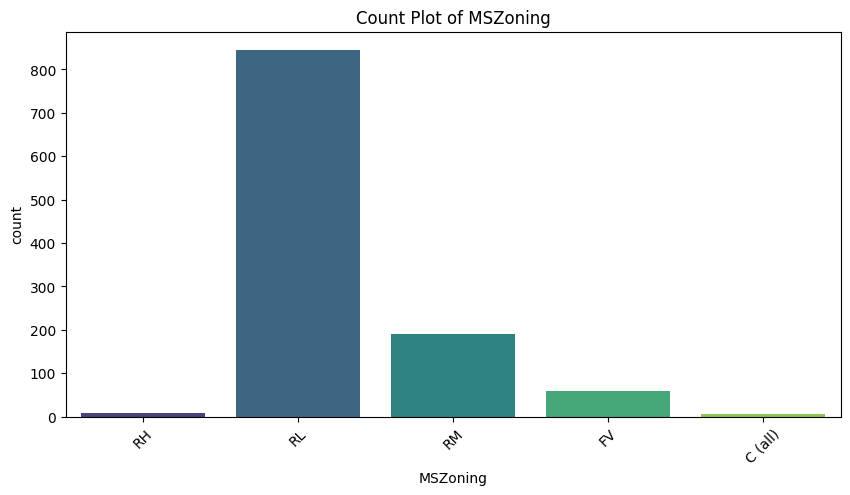

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_49966/1184493223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


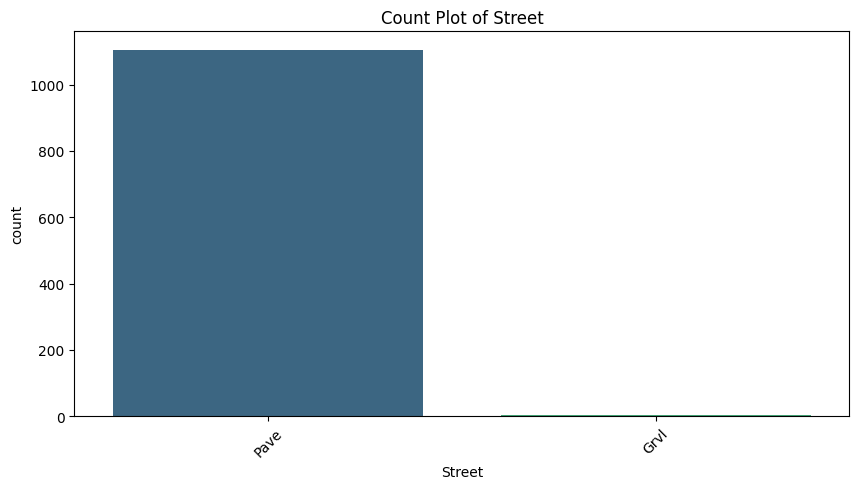

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_49966/1184493223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


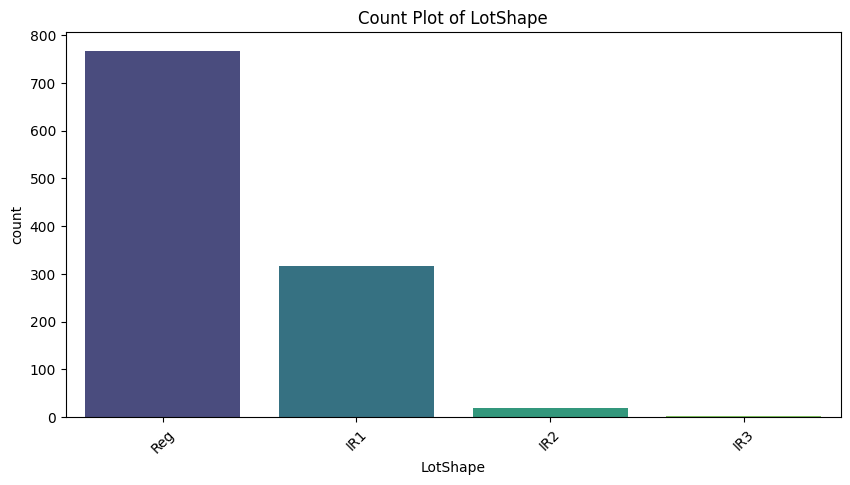

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_49966/1184493223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


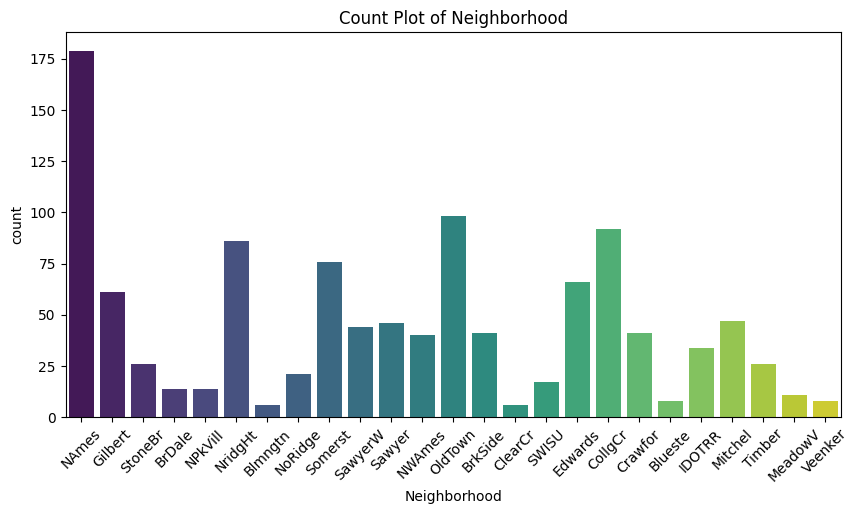

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_49966/1184493223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


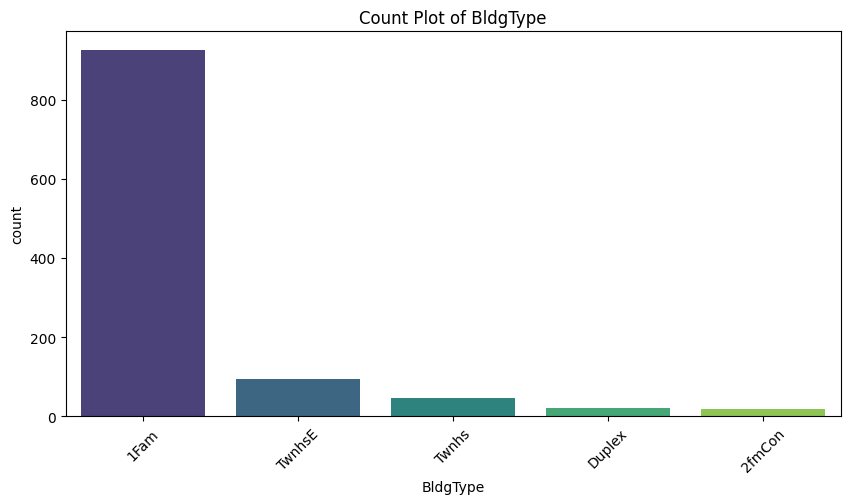

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_49966/1184493223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


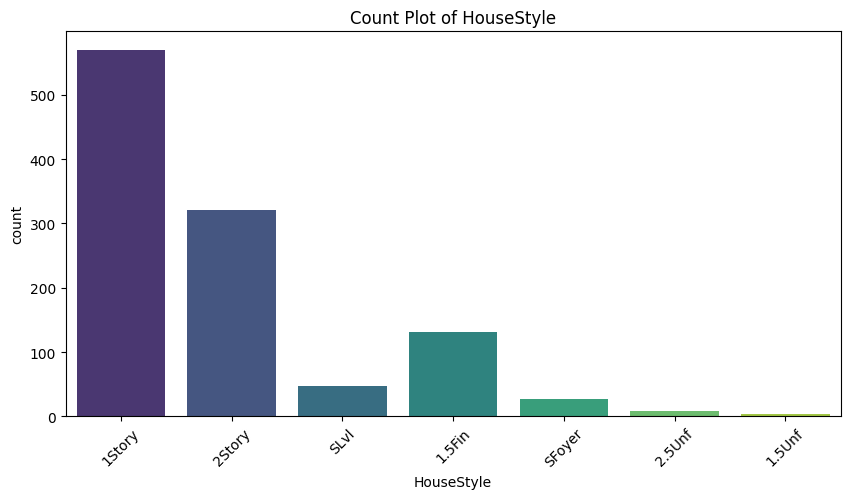

In [17]:
# 1. Count Plot for Categorical Columns with Moderate Unique Values
selected_categorical_cols = ['MSZoning', 'Street', 'LotShape', 'Neighborhood', 'BldgType', 'HouseStyle']
for col in selected_categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

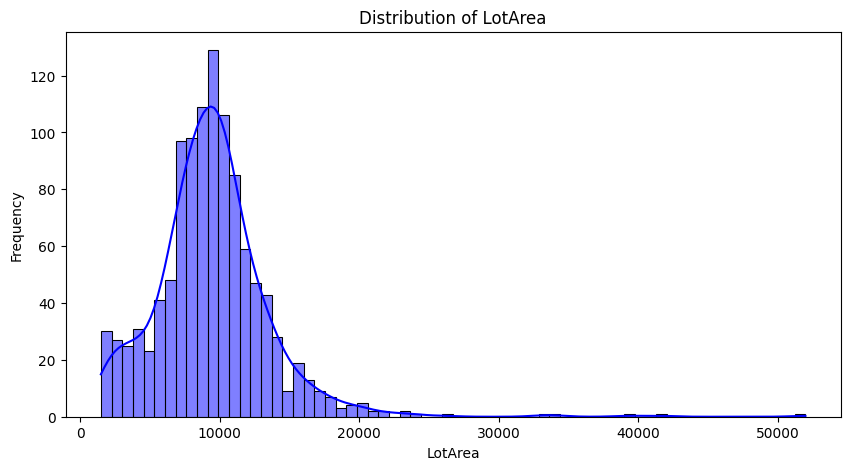

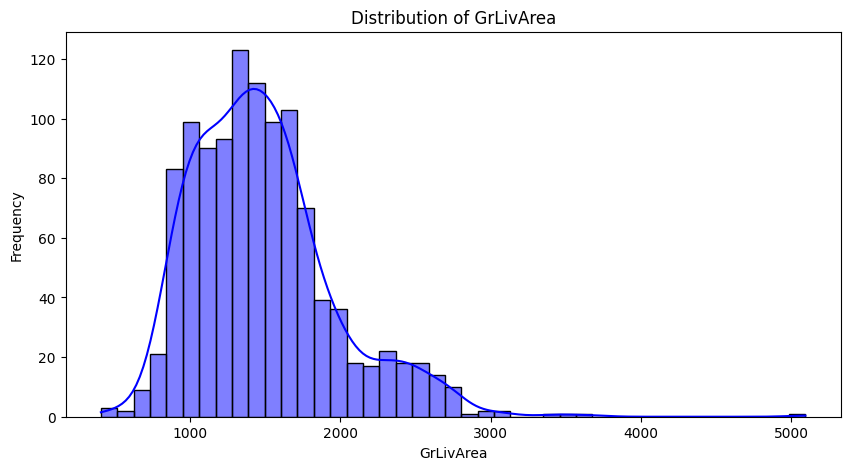

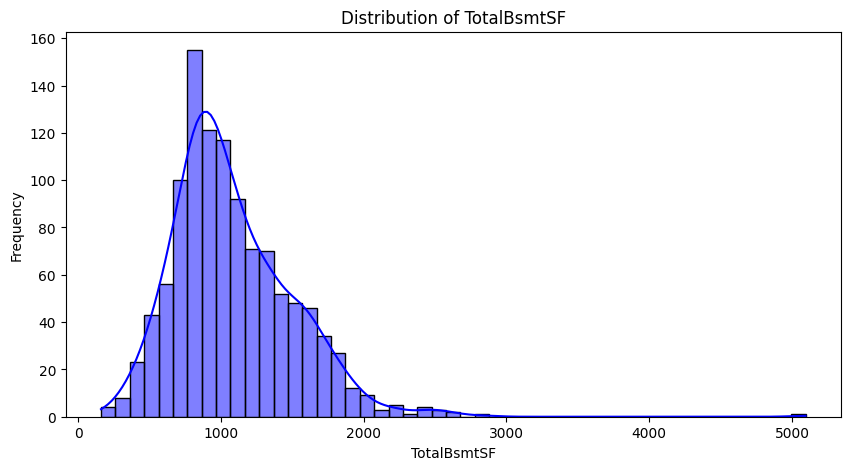

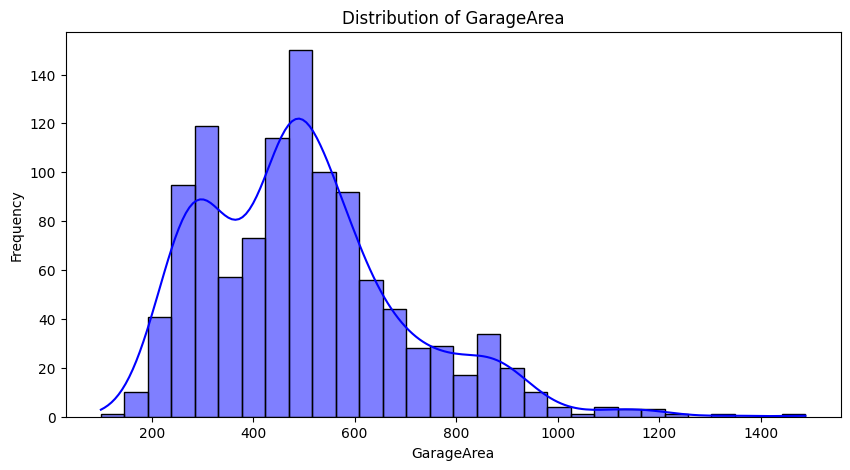

In [18]:
# 2. Distribution Plot for Numerical Columns
numerical_cols = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# 3. Box Plot to Analyze the Relationship between Sale Price and Neighborhood
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', palette="viridis")
plt.title("Sale Price by Neighborhood")
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret value `SalePrice` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x800 with 0 Axes>

In [20]:
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Encl

In [21]:
df = df.merge(sale_price_df[['Id', 'SalePrice']], on='Id', how='left')

NameError: name 'sale_price_df' is not defined